In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Flight.tsv',sep='\t')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [15]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [5]:
# Additional_Info contains almost 80% no_info.So we will drop it.
df.drop(['Additional_Info'],axis=1,inplace=True)

In [16]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [6]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [39]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
#encoding the Total_Stops column
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [9]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]
Source = pd.get_dummies(Source)
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [44]:
df["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [7]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [10]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
df= pd.concat([df, Airline, Source, Destination], axis = 1)

In [11]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [12]:
#total_Stops is related to route.From the route we get to know how many stops are there.hence we can drop the route column.
df.drop(['Route'],axis=1,inplace=True)

In [13]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [14]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [15]:
# Now we can drop as it is of no use.

df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [16]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [17]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [18]:
# Time taken by plane to reach destination is called Duration
# It is the differnce between Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [19]:
# Adding duration_hours and duration_mins list to train_data dataframe
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [20]:
df.drop(["Duration"], axis = 1, inplace = True)

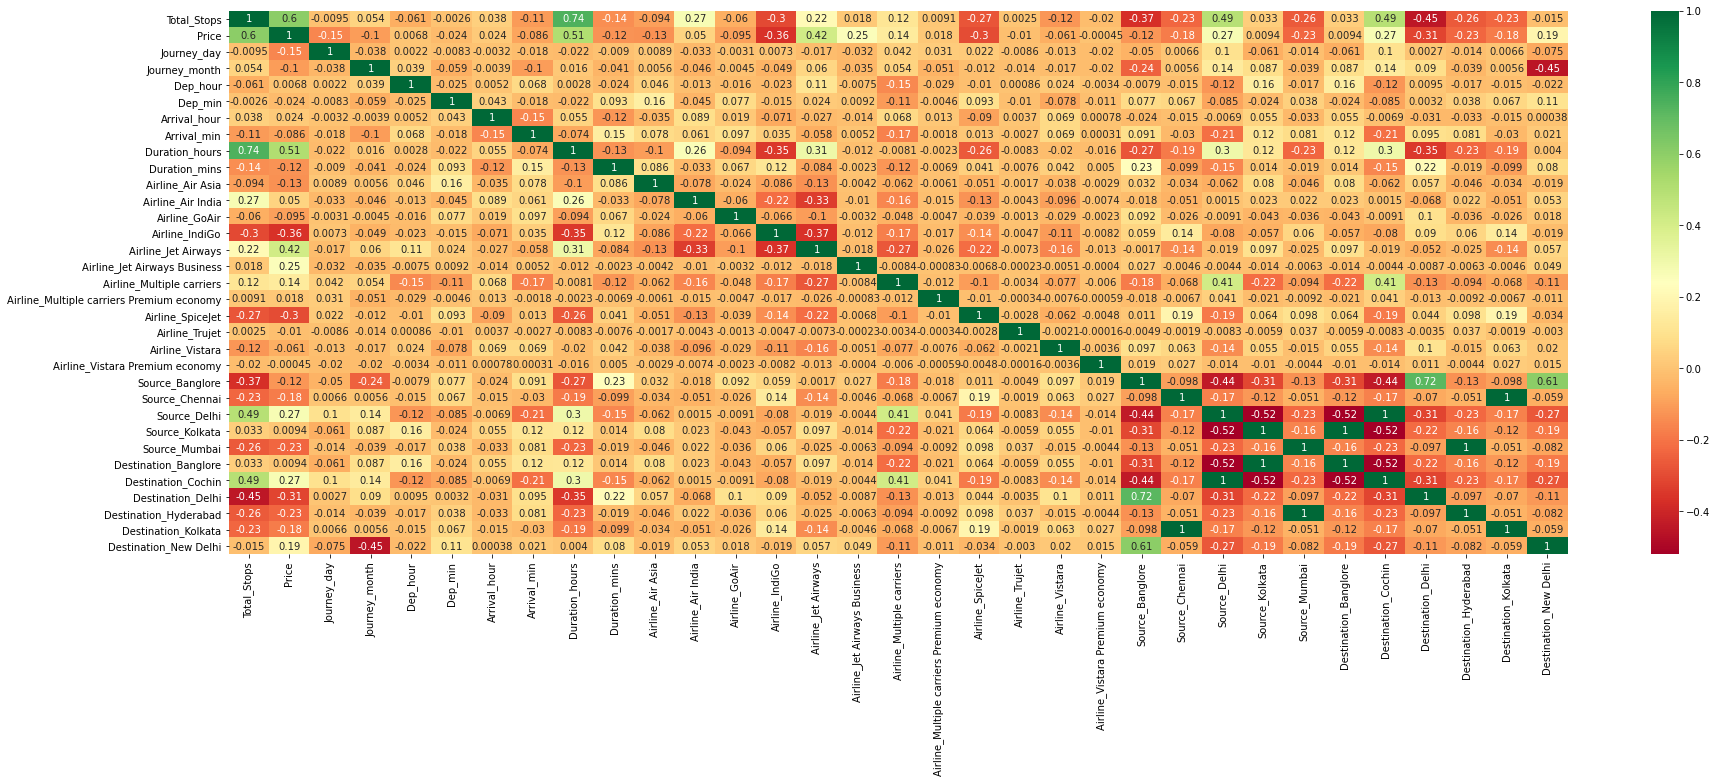

In [59]:
plt.figure(figsize = (30,10))
sns.heatmap(df.corr('pearson'), annot = True, cmap = "RdYlGn")

plt.show()

* Total Stops,duration hrs,Airline jet airways has show a positive correlation with Price.
* Destination Delhi,Airline Indigo ,Air line Spicejet show a negative correlation with price.

<AxesSubplot:>

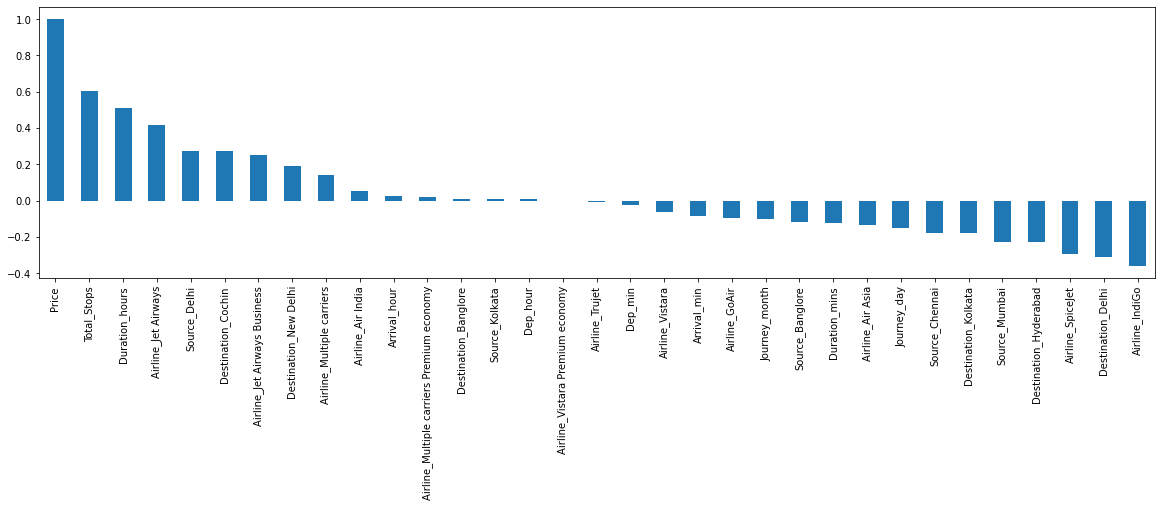

In [57]:
df.corr()['Price'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

In [67]:
df

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2.0,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1.0,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1.0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107,9,4,19,55,22,25,2,30,...,0,0,1,0,1,0,0,0,0,0
10679,0.0,4145,27,4,20,45,23,20,2,35,...,0,0,1,0,1,0,0,0,0,0
10680,0.0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0.0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df.isnull().sum()

Total_Stops                                  1
Price                                        0
Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Banglore                              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Banglore                         0
Destination_Cochin                           0
Destination_D

In [21]:
#dropping the rows with null values from our dataset
df=df.dropna()

In [22]:
df_test=pd.read_csv("Price_test.tsv",sep='\t')

In [23]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [24]:
# Additional_Info contains almost 80% no_info.So we will drop it.
df_test.drop(['Additional_Info'],axis=1,inplace=True)

# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df_test[["Airline"]]
Airline = pd.get_dummies(Airline)


#encoding the Total_Stops column
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df_test[["Source"]]
Source = pd.get_dummies(Source)

# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df_test[["Destination"]]
Destination = pd.get_dummies(Destination)


# Concatenate dataframe --> train_data + Airline + Source + Destination
df_test= pd.concat([df_test, Airline, Source, Destination], axis = 1)

df_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

#total_Stops is related to route.From the route we get to know how many stops are there.hence we can drop the route column.
df_test.drop(['Route'],axis=1,inplace=True)

df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month

# Now we can drop as it is of no use.

df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour

# Extracting Minutes
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df_test["Arrival_hour"] = pd.to_datetime(df_test["Arrival_Time"]).dt.hour

# Extracting Minutes
df_test["Arrival_min"] = pd.to_datetime(df_test["Arrival_Time"]).dt.minute

# Now we can drop Arrival_Time as it is of no use
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Time taken by plane to reach destination is called Duration
# It is the differnce between Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
    
# Adding duration_hours and duration_mins list to train_data dataframe
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins

df_test.drop(["Duration"], axis = 1, inplace = True)


In [109]:
df_test.isnull().sum()

Total_Stops                                  0
Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Banglore                              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Banglore                         0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_K

In [25]:
df_test.shape

(2671, 31)

In [26]:
df_testy=pd.read_csv('Price_Y.csv')

In [65]:
df_testy.shape

(2671, 1)

In [64]:
Y.shape

(10682,)

In [62]:
X.columns

Index(['Total_Stops', 'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

# Models

In [38]:
X=df.drop(["Price"],axis=1)
Y=df.iloc[:, 1]

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

model=[DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),LinearRegression()]
max_r2_score=0
for r_state in range(30,95):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=r_state,test_size=0.3)
    for i in model:
        i.fit(x_train,y_train)
        pred=i.predict(x_test)
        r2_sc=r2_score(y_test,pred)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i

print("max r2 score correspond to random state",final_state,"is",max_r2_score,"and model is",final_model)

max r2 score correspond to random state 49 is 0.8339804830038563 and model is RandomForestRegressor()


In [40]:
#splitting the data into 70% training and 30% testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=49)

In [44]:
cross_val_score?

In [45]:
from sklearn.model_selection import cross_val_score


def rmse_cv(model, x,y):
    rmse =-(cross_val_score(model,X,Y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor()]
            


names = ['LR','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,X,Y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 8080615.309042, 1118955.881241
RF    : 4006309.398509, 908905.463231
DTR    : 6087370.011103, 982637.426077
GBR    : 4875032.797772, 795714.096060


* selecting Random Forest for CV and hyperparameter tuning as difference between mean and std score is less.

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
parameter={'min_samples_leaf': [1, 2, 5, 10],'min_samples_split': [2,5,10,15,100],
     'n_estimators':[100,200,300,400],
          'max_depth':[5,10,15,20,30],
          'max_features':['auto','sqrt']}
RCV=RandomizedSearchCV(RandomForestRegressor(),parameter,cv=5,n_iter=10,scoring='accuracy',verbose=2,n_jobs=-1)
RCV.fit(x_train,y_train)

RCV.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

In [48]:
final_mod=RandomForestRegressor(min_samples_split=10,max_depth= 20,min_samples_leaf= 10,max_features='auto', n_estimators=400)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.7785880443864288


In [49]:
print('MSE:',mean_squared_error(y_test,pred))
print('MAE:',mean_absolute_error(y_test,pred))
print('r2_score:',r2_score(y_test,pred))

MSE: 4788092.454481263
MAE: 1304.136958568909
r2_score: 0.7785880443864288


In [52]:
import joblib
joblib.dump(final_mod,'Plant_capacity.obj')

['Plant_capacity.obj']

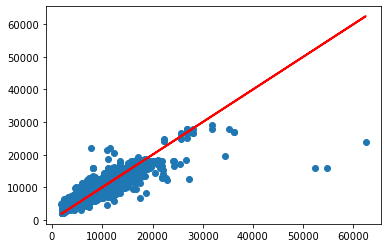

In [51]:
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,linewidth=2,color='Red')

In [ ]:
pred=final_mod.predict(df_test)
r2_sc=r2_score(y_test,df_testy)
print(r2_sc)

In [69]:
t=df_testy['Price']

In [72]:
a=np.array(list(t))
predicted=np.array(final_mod.predict(df_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,15998,18722.060304
1,16612,19352.170111
2,25572,21434.848910
3,25778,22090.661852
4,16934,19630.884460
...,...,...
2666,14046,19952.365394
2667,14086,18040.589641
2668,22720,19904.415534
2669,23544,21533.100468
